# Nama: Laksmi Dyah Nurlita
# NIM: 21110023
# Kelas: S1SD02-A

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Import dataset
dataset = pd.read_csv('salary.csv')

#Print dataset 5 terbawah
dataset.tail()

,Age,Salary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [ ]:
#Dimensi data
dataset.shape

(400, 3)

Output: terdiri dari 400 baris dan 3 kolom

In [ ]:
#Melihat informasi
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


Output: terdiri dari 400 baris dari index 0-399, memiliki total 3 kolom yg memiliki masing-masing data non-null. setiap kolom memiliki type data integer 64 bit

**Split Data**

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

output: Dalam memprediksi apakah seseorang akan membeli berdasarkan umur dan gaji, maka pada variabel y untuk kolom 'Purchased' dan variabel x untuk kolom 'Age' dan 'Salary'

In [ ]:
#Memisahkan data menjadi train dan test
from sklearn.model_selection import train_test_split

#Masukkan ukuran test sebesar 25%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

**Scaling**
> Data yang dimasukkan bisa terdistribusi

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scaling input data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

**Bernoulli**
> Salah satu jenis algoritma klasifikasi yang merupakan variasi dari algoritma Naive Bayes. Cocok digunakan pada data ketegorikal biner (0 dan 1) yang memprediksi kelas output diskrit.

In [ ]:
from sklearn.naive_bayes import BernoulliNB

#Buat objek classifier
classifier_bern = BernoulliNB()

#Training model
classifier_bern.fit(x_train, y_train)

#Testing model
y_pred_bern = classifier_bern.predict(x_test)

Output: sudah melatih model dgn data x_train dan y_train. Kemudian, memprediksi data x_test menggunakan model tersebut. Hasil disimpan dalam variabel y_pred_bern

Akurasi bernoulli

In [ ]:
from sklearn.metrics import accuracy_score

#Print akurasi model
print(accuracy_score(y_pred_bern, y_test))

0.8


Output: Akurasi model dgn membandingkan hasil prediksi dengan hasil sesungguhnya dan mendapatkan nilai 0,8 atau 80% yang berarti model dapat memprediksi 80% data secara akurat.

Evaluasi Bernoulli

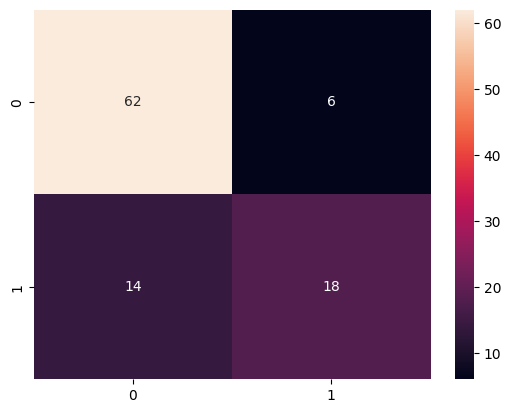

In [ ]:
from sklearn.metrics import confusion_matrix

#Membandingkan data test dan data prediksi
cm = confusion_matrix(y_test, y_pred_bern)

#Nilai data di setiap bagian matriks
sns.heatmap(cm, annot = True)
plt.savefig('Confusion_bern.png')

Output: Pada baris pertama kolom pertama terdapat 62 label '0' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 6 label'0' yang diprediksi sebagai label '1', sehingga diprediksi dengan salah. Pada baris pertama kolom kedua terdapat 14 label '1' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 18 label'1' yang diprediksi dengan benar.

In [ ]:
from sklearn.metrics import classification_report

#Tampilkan classification report bernoulli
print(classification_report(y_test, y_pred_bern))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        68
           1       0.75      0.56      0.64        32

    accuracy                           0.80       100
   macro avg       0.78      0.74      0.75       100
weighted avg       0.79      0.80      0.79       100



**Gaussian Naive Bayes**
> Digunakan dalam data berdistribusi normal.

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Buat objek classifier
classifier_gaus = GaussianNB()

#Training model
classifier_gaus.fit(x_train, y_train)

#Testing model
y_pred_gaus = classifier_gaus.predict(x_test)

Output: sudah melatih model dgn data x_train dan y_train. Kemudian, memprediksi data x_test menggunakan model tersebut. Hasil disimpan dalam variabel y_pred_gaus

Akurasi Gaussian

In [ ]:
#Print akurasi model
print(accuracy_score(y_test, y_pred_gaus))

0.91


Output: Akurasi model dgn membandingkan hasil prediksi dengan hasil sesungguhnya dan mendapatkan nilai 0,91 atau 91% yang berarti model dapat memprediksi 91% data secara akurat.

Evaluasi Gaussian

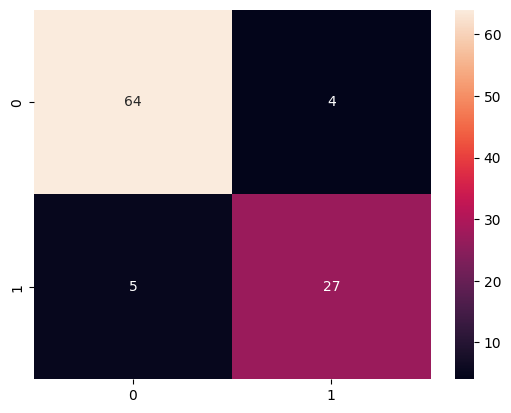

In [ ]:
#Membandingkan data test dan data prediksi
cm = confusion_matrix(y_test, y_pred_gaus)

#Nilai data di setiap bagian matriks
sns.heatmap(cm, annot = True)
plt.savefig('Confusion_gaus.png')

Output: Pada baris pertama kolom pertama terdapat 64 label '0' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 4 label'0' yang diprediksi sebagai label '1', sehingga diprediksi dengan salah. Pada baris pertama kolom kedua terdapat 5 label '1' yang diprediksi dengan benar, pada baris pertama kolom kedua terdapat 27 label'1' yang diprediksi dengan benar.

In [ ]:
#Tampilkan classification report bernoulli
print(classification_report(y_test, y_pred_gaus))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



**Multinomial**
> Digunakan apabila data merupakan variabel diskrit.

In [4]:
#Import dataset
data = pd.read_csv('spam.csv', encoding = 'latin-1')

#Print dataset 5 teratas
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Hapus kolom

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [6]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Ubah kolom 'class' jadi numerik

In [7]:
data['class'] = data['class'].map({'ham': 0, 'spam': 1})

Output: Karena ML hanya menerima input berupa angka
> 'ham' = 0, s'spam' = 1

In [8]:
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Definisikan variabel x (input) dan y (output)
x = data['message']
y = data['class']

Output: Memasukkan kolom 'message' ke dalam variabel x, serta kolom 'class' ke dalam variabel y

In [10]:
#vektorisasi
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(x)

In [11]:
#Memisahkan data menjadi train dan test
from sklearn.model_selection import train_test_split

#Masukkan ukuran test sebesar 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
#Buat model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

#Melatih model
model.fit(x_train, y_train)

MultinomialNB()

Akurasi

In [13]:
model.score(x_test, y_test)

0.97847533632287

Memprediksi data baru

In [15]:
#Contoh
msg = 'You Won 500$'

#Ubah jadi vektor
data = [msg]
vect = cv.transform(data).toarray()

#Prediksi
my_prediction = model.predict(vect)
my_prediction

array([1])

Output: Pesan 'You Win 500$' berlabel 1 atau pesan spam